In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [5]:
iris=pd.read_csv("Downloads\\iris.csv")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [12]:
label_encoder=preprocessing.LabelEncoder()
iris['Species1']=label_encoder.fit_transform(iris['Species'])


In [13]:
iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [14]:
iris['Species1']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species1, Length: 150, dtype: int32

In [15]:
iris['Species1'].value_counts()

0    50
1    50
2    50
Name: Species1, dtype: int64

In [16]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species1
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [17]:
x=iris.iloc[:,0:4]
y=iris['Species1']

In [18]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species1, Length: 150, dtype: int32

In [20]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
colnames=list(iris.columns)
colnames

['Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species',
 'Species1']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [27]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(435.9375, 990.9375, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(290.625, 707.8125, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(581.25, 707.8125, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(290.625, 424.6875, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(145.3125, 141.5625, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(435.9375, 141.5625, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(871.875, 424.6875, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(726.5625, 141.5625, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(1017.1875, 141.5625, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

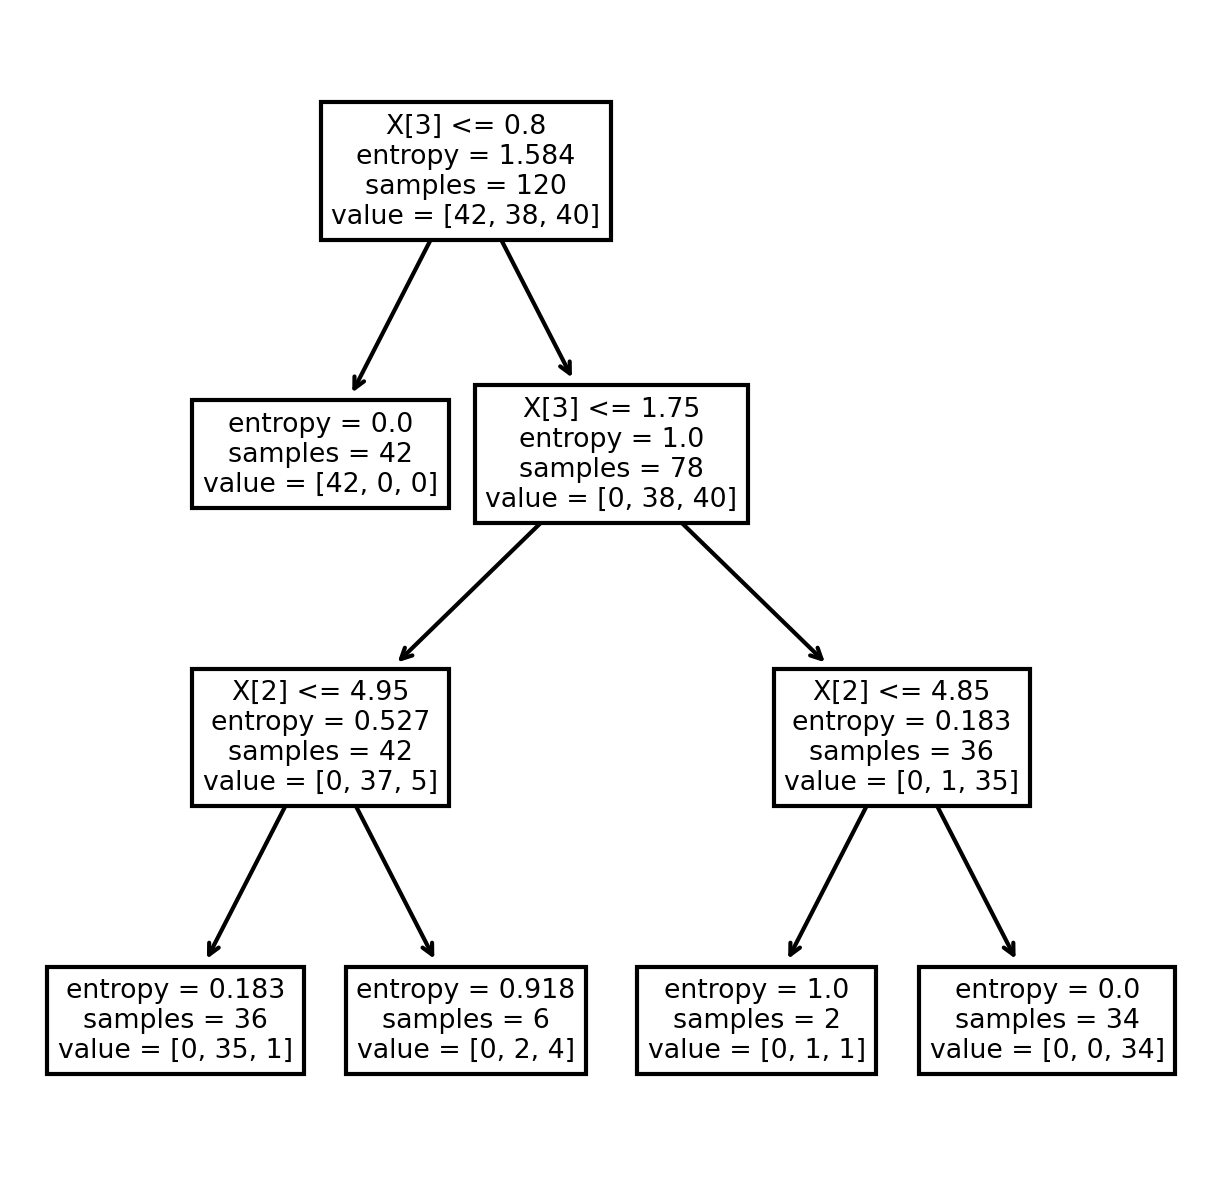

In [32]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model)

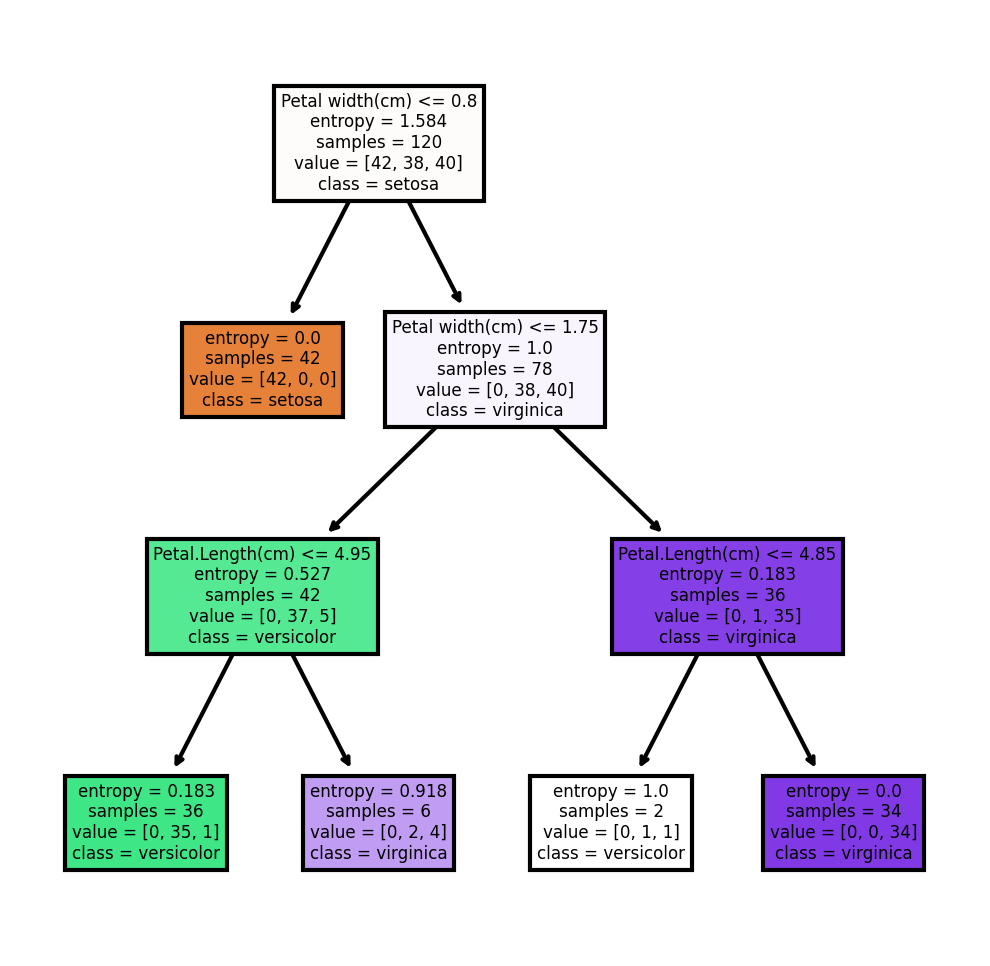

In [38]:
fn=['Sepal.Length(cm)','Sepal.Width(cm)','Petal.Length(cm)','Petal width(cm)']
cn=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [40]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

In [41]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [42]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species1,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [43]:
np.mean(preds==y_test)

0.9666666666666667

In [63]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [64]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
preds=model_gini.predict(x_test)
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [66]:
np.mean(preds==y_test)

0.9666666666666667

In [67]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species1,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [55]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [56]:
model_gini.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [57]:
preds=model_gini.predict(x)
np.mean(preds==y)

0.9733333333333334

In [58]:
pd.crosstab(y,preds)

col_0,0,1,2
Species1,,,
0,50,0,0
1,0,47,3
2,0,1,49


In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
array=iris.values
x=array[:,0:3]
y=array[:,3]

In [70]:
x

array([[5.1, 3.5, 1.4],
       [4.9, 3.0, 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5.0, 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5.0, 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3.0, 1.4],
       [4.3, 3.0, 1.1],
       [5.8, 4.0, 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1.0],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5.0, 3.0, 1.6],
       [5.0, 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5.0, 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3.0, 1.3],
       [5.1, 3.4, 1.5],
       [5.0, 3.5, 1.3],
       [4.5, 2.3

In [71]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3,
       1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8], dtype=object)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [73]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(105, 3) (45, 3) (105,) (45,)


In [74]:
model=DecisionTreeRegressor(criterion='poisson')


In [78]:
model.score(x_train,y_train)

0.9983534700339013

In [77]:
model.score(x_test,y_test)

0.9314948181977868